28/09/2023

Frida Lizett Zavala Pérez A01275226

# Business case: Understanding profitability in the US financial market

This project is composed of 2 parts: 1) Advanced topics of multiple regression models, and 2) Basics of Time-series regression models



# Part 1 - Advanced topics in multiple regression
The topics we will learn and apply in this part are the following:

Descriptive statistics for ratios

Multiple regression with categorical variables

Multiple regression with interaction effects

Treatment of extreme values for independent variables - winsorization

Estimation of beta coefficients and standard errors in multiple regression using matrix algebra

The Hat Matrix

Identification of leverage observations

Identification of possible outliers

Identification and treatment of possible influential observations

## Librerías y acceso a los datos

In [467]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np

#cargar data
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [468]:
dataus = '/content/drive/MyDrive/IA concentracion/Bloque 2/Mod 5/dataus2023.csv'
firmsus = '/content/drive/MyDrive/IA concentracion/Bloque 2/Mod 5/firmsus2023.csv'

data = pd.read_csv(dataus)
print(data.shape)

firms = pd.read_csv(firmsus)
print(firms.shape)


(533088, 22)
(5615, 7)


In [469]:
data['qdate'] = pd.PeriodIndex(data.q, freq = 'Q')
data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,qdate
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,63.332411,104.0000,452000.000,2000,NaN,NaN,2000Q1
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,2679000.0,2186000.0,0.0,44.911205,73.7500,452271.967,2000,1453000.0,2000.0,2000Q2
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,2925000.0,2510000.0,0.0,29.801249,48.9375,453014.579,2000,1581000.0,2000.0,2000Q3
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,3160000.0,2758000.0,0.0,33.340861,54.7500,456366.381,2000,1741000.0,2000.0,2000Q4
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,3667000.0,3070000.0,0.0,18.713509,30.7300,456769.737,2001,1821000.0,2001.0,2001Q1


In [470]:
data.tail()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,qdate
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.78,2.78,104098.538,2022,NaN,NaN,2022Q3
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.43,2.43,104098.538,2022,NaN,NaN,2022Q4
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,104098.538,2023,NaN,NaN,2023Q1
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,104098.538,2023,NaN,NaN,2023Q2
533087,ZY_old,2023q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,104098.538,2023,NaN,NaN,2023Q3


In [471]:
firms.head()

,empresa,Nombre,status,partind,naics1,naics2,SectorEconomatica
0,A,"Agilent Technologies, Inc",activo,0.1,Industrias manufactureras,"Fabricación de instrumentos de medición, contr...",Electroelectronic
1,AA,Alcoa Corp,activo,NaN,Industrias manufactureras,Industria básica del aluminio,Siderur & Metalur
2,AABA_old,Altaba Inc,cancelado,NaN,"Servicios profesionales, científicos y técnicos",Servicios de diseño de sistemas de cómputo y s...,Software y Datos
3,AAC_old,Aac Hldg Inc,cancelado,NaN,Servicios de salud y de asistencia social,Otros consultorios para el cuidado de la salud,Otros
4,AAIC,Arlington Asset Investment Corp,activo,NaN,Servicios financieros y de seguros,Otros fondos,Fondos


In [472]:
firms.columns

Index(['empresa', 'Nombre', 'status', 'partind', 'naics1', 'naics2',
       'SectorEconomatica'],
      dtype='object')

In [473]:
firms1 = firms[['empresa', 'Nombre', 'status', 'naics1']]
firms1.columns = ['firm', 'empresa', 'status', 'industria']


In [474]:
data = pd.merge(data, firms1, on = 'firm', how = 'left')
data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,qdate,empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.332411,104.0000,452000.000,2000,NaN,NaN,2000Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,44.911205,73.7500,452271.967,2000,1453000.0,2000.0,2000Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,29.801249,48.9375,453014.579,2000,1581000.0,2000.0,2000Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,33.340861,54.7500,456366.381,2000,1741000.0,2000.0,2000Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,18.713509,30.7300,456769.737,2001,1821000.0,2001.0,2001Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras


## 1.1 Descriptive Statistics

In [475]:
#Calculate log quarterly returns (rq) and log annual returns (ry).
data['rq']= np.log(data['adjprice'])-  np.log(data.groupby(['firm'])['adjprice'].shift(4))
data['ry']= np.log(data['adjprice'])-  np.log(data.groupby(['firm'])['adjprice'].shift(1))

#Calculate 1-quarter future log quarterly returns (f1rq)
# Retornos 1 año en el futuro
data['f1rq'] = data['rq'].shift(-1)
data['f4rq'] = data['rq'].shift(-4)

data['f1ry']= data.groupby(['firm'])['ry'].shift(-1)
data['f4ry']= data.groupby(['firm'])['ry'].shift(-4)

#Separción del número de trimestre y año
data['qy'] = data['q'].str[:4]

##Calculate operating profit (also called earnings before interest and taxes) : ebit = revenue - cogs - sgae
# ebit = operating profit = earnings before interest and taxes
data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']


##Calculate operating profit margin: opm = ebit / revenue5
data['opm'] = np.where(data['revenue'] == 0, np.NaN, data['ebit'] / data['revenue'])

##Calculate net income as: netincome = ebit + otherincome + extraordinaryitems - financial expenses - incometax
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']


##Calculate profit margin (ratio) as: pm = ni / revenue
#profit margin
data['pm'] = np.where(data['revenue'] == 0, np.NaN, data['netincome'] / data['revenue'])


##Calculate asset turn over ratio: ato = revenue / totalassets
#ato = asset turn over = que tanto la empresa vendio con respectoa su total de activos
data['ato'] = np.where(data['totalassets'] == 0, np.NaN, data['revenue'] / data['totalassets'])

#Calculate acid ratio: acidratio = currentassets / currentliabilities
data['acidratio'] = np.where(data['currentliabilities'] == 0, np.NaN, data['currentassets'] / data['currentliabilities'])

##Calculate financial leverage ratio as: finlev=longdebt / totalassets
#financial leverage = apalancamiento ; que tanto la empresa debe $ con respecto a los que tien de activos
data['finlev'] = np.where(data['totalassets'] == 0, np.NaN, data['longdebt'] / data['totalassets'])


##Calculate market value as: mvalue = originalprice * sharesoutstanding
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']


##Calculate book value as: bookvalue = totalassets - totalliabilities
data['bookvalue'] = data['totalassets'] - data['totalliabilities']

data.head(10)

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,qy,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.700800e+07,NaN
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,2000,385000.0,0.081378,297000.0,0.062777,0.646223,2.313358,0.000000,3.335506e+07,4642000.0
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,2000,595000.0,0.080395,452000.0,0.061073,0.945573,2.129084,0.000000,2.216940e+07,4902000.0
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,2000,1053000.0,0.097744,757000.0,0.070268,1.278694,2.050399,0.000000,2.498606e+07,5265000.0
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,2001,279000.0,0.098205,154000.0,0.054206,0.308536,1.778827,0.000000,1.403653e+07,5541000.0
5,A,2001q2,6.0,4930000.0,2683000.0,2025000.0,277000.0,-14000.0,0.0,235000.0,...,2001,222000.0,0.045030,250000.0,0.050710,0.542952,1.613299,0.000000,1.485486e+07,5616000.0
6,A,2001q3,9.0,6736000.0,3829000.0,3027000.0,312000.0,-19000.0,0.0,142000.0,...,2001,-120000.0,-0.017815,31000.0,0.004602,0.781257,1.660485,0.000000,9.005459e+06,5487000.0
7,A,2001q4,12.0,8396000.0,5166000.0,4008000.0,301000.0,580000.0,0.0,-71000.0,...,2001,-778000.0,-0.092663,174000.0,0.020724,1.051340,2.397103,0.000000,1.321995e+07,5659000.0
8,A,2002q1,3.0,1426000.0,878000.0,990000.0,19000.0,2000.0,0.0,-106000.0,...,2002,-442000.0,-0.309958,-315000.0,-0.220898,0.166628,3.293373,0.134377,1.621654e+07,5395000.0
9,A,2002q2,6.0,2883000.0,1732000.0,1942000.0,41000.0,-4000.0,0.0,-186000.0,...,2002,-791000.0,-0.274367,-568000.0,-0.197017,0.349964,3.269111,0.139597,1.097945e+07,5128000.0


# B2
For the Descriptive Statistics of your industry using only the most recent fiscal year observations (fiscalmonth=12, year=2022), do the following modifications:

**Commercial industries (retail and wholesale)**

In [476]:
#df con solo industrias  "Commercial industries"
data = data.loc[(data['status'] == 'activo')]#activas

#industria
filter = (data['industria'] == 'Comercio al por mayor')
wholesale = data[filter]
filter = (data['industria'] == 'Comercio al por menor')
retail = data[filter]
comerce_ind = pd.concat([wholesale, retail], axis=0)
comerce_ind = comerce_ind[(comerce_ind['fiscalmonth']==12)]
#recent fiscal year
comerce_ind_22=comerce_ind[(comerce_ind['year']==2022)]


In [477]:
# Obtener los nombres de las columnas
nombres_columnas = comerce_ind_22.columns

# Imprimir los nombres de las columnas
print(nombres_columnas)

Index(['firm', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding', 'year',
       'fixedassets', 'yearf', 'qdate', 'empresa', 'status', 'industria', 'rq',
       'ry', 'f1rq', 'f4rq', 'f1ry', 'f4ry', 'qy', 'ebit', 'opm', 'netincome',
       'pm', 'ato', 'acidratio', 'finlev', 'mvalue', 'bookvalue'],
      dtype='object')


In [478]:
# Seleccionamos las columnas correspondientes a ratios, sus numeradores y denominadores
ratios_columns = ['opm', 'pm', 'ato', 'acidratio', 'finlev']
numerators_columns = ['ebit', 'netincome', 'revenue', 'currentassets', 'longdebt']
denomintaor_columns = ['revenue', 'revenue', 'totalassets', 'currentliabilities', 'totalassets']

In [479]:
# Inicializamos un array de ceros 'weight_mean' para almacenar los promedios ponderados de los numeradores y denominadores
weight_mean = np.zeros(len(ratios_columns), dtype=float)

# Calculamos el promedio ponderado para cada ratio y almacenamos los resultados en 'weight_mean'
for i in range(len(ratios_columns)):
    name = ratios_columns[i]
    weight_mean[i] = comerce_ind_22[numerators_columns[i]].sum() / comerce_ind_22[denomintaor_columns[i]].sum()


In [480]:
 #transponer el df
df_stats = comerce_ind_22[ratios_columns].describe().loc[['mean', '50%']]
df_stats = df_stats.T
#añadir los promedios ponderados
df_stats['weight mean'] = weight_mean
print(df_stats)

               mean       50%  weight mean
opm        0.009514  0.057281     0.044117
pm        -0.009363  0.040713     0.027390
ato        1.796581  1.550532     1.891650
acidratio  1.985844  1.621304     1.101586
finlev     0.326725  0.302122     0.312975


Compare this weighted average with the arithmetic mean and the median. Which is the best measure for central tendency of the ratios? Interpret the weighted average of profit margin and asset turn over of your industry.

La elección a la mejor de estas depende de la distribucupon de los datos, ya que el promedio se ve afectado por valores extremos, sonsiderando que se estan trabajando con empresas diferentes, que reportan datos que podrían encontrarse en escalas diversas esta no es la mejor medida a seleccionar. En cuanto a la mediana, esta noes tan sencible a los valores extremos y resulta útil cuándo hay valores extremos que podrían de alguna manera sesgar el promedio, en este contexto podría ser una opción a considerar. El promedio ponderado por su parte da más peso a ciertos valores asignando pesos diferentes, lo cuál puede ser de utilidad puede ser útil cuando queremos darle más relevancia a ciertos datos.

Ahora bien, odemos ver que el promedio y la media en opm y pm son valores un poco alejados entre sí, lo que nos indica que la distribución está sesgada por valores extremos, sin embargo en el resto de los ratios se observan valores similares, lo cual significaría lo contrario.
Comportamiento similar que observamos con el promedio ponderado, con opm y pm muestra valores alejados de del promedio y la media, lo cual podría indicar que algunos de los datos interfieren de forma desproporcionada.

profit margin: 0.027390

Me indica el promedio ponderado de los margenes de beneficio en la industria, lo cual seria una ganancia del 2.7%

asset turn over: 1.891650

Me indica el promedio ponderado de la rotación de avtivos en la empresa. Es un valor muy alto, lo que nos dice que el 189% de los activos se han convertido en ganancias. Estas industrias están generando más ingresos con relación a los activos totates.



# Regresión lineal múltiple

## 1.2.1 Calcular variables

For the complete historical dataset of annual fiscal years (fiscalmonth=12 for all quarter-years), you have to calculate the following new independent variables:




Firm size as a categorical variable. For each quarter, you have to label firms in 3 equal groups: small, medium, big according to the market value of the firms.

empresas, chicas, medianas y grandes.

In [481]:
df = comerce_ind
# Calculamos percentiles para la columna 'mvalue' en el DataFrame
limits = [0.3333, 0.6666]
percentiles = df['mvalue'].quantile(limits)

# Definimos una función para categorizar los valores en función de los percentiles calculados
def categorize_size(value):
    if value <= percentiles[limits[0]]:
        return 'small'
    elif value <= percentiles[limits[1]]:
        return 'medium'
    else:
        return 'big'

#crear la columna size
df['size'] = df['mvalue'].apply(categorize_size)

In [482]:
#Muestra los resultados de la clasificacion
df['size']
# Contar la frecuencia de cada tamaño
conteo_tam = df['size'].value_counts()

# Imprimir el resultado
print(conteo_tamanos)

df.head()

big       1058
small     1002
medium    1002
Name: size, dtype: int64


,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue,size
1526,ABC,2001q3,12.0,16191353.0,15491235.0,440742.0,0.0,-12172.0,45677.0,77731.0,...,259376.0,0.016019,123796.0,0.007646,1.573313,1.357897,0.155209,NaN,2838564.0,big
1530,ABC,2002q3,12.0,45234794.0,43210320.0,1306046.0,0.0,-5647.0,140734.0,227106.0,...,718428.0,0.015882,344941.0,0.007626,4.034134,1.368901,0.156648,7.563167e+06,3316338.0,big
1534,ABC,2003q3,12.0,49657328.0,47410169.0,1364053.0,-4220.0,-8015.0,144744.0,284898.0,...,883106.0,0.017784,441229.0,0.008885,4.124320,1.415980,0.143082,6.048175e+06,4005317.0,big
1538,ABC,2004q3,12.0,53178954.0,50999772.0,1288748.0,-17356.0,0.0,112705.0,291983.0,...,890434.0,0.016744,468390.0,0.008808,4.563149,1.359029,0.099289,6.039068e+06,4339045.0,big
1542,ABC,2005q3,12.0,54577321.0,52597137.0,1343238.0,-110898.0,-27277.0,57223.0,176903.0,...,636946.0,0.011671,264645.0,0.004849,4.795403,1.319822,0.083601,8.023491e+06,4280357.0,big


Calculate the corresponding dummy (binary) variables for the firm size following the dummy encoding method.

Calculate operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice

Calculate earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice

Calculate book-to-market ratio: bmr = bookvalue / marketvalue


In [483]:
# Dummie encoding: Transforma la columna categórica 'size' en variables dummy y añade al DataFrame
df = pd.get_dummies(df, columns=['size'], prefix='size')

# Calcular las ganancias operativas por acción desinfladas por el precio de las acciones
#operating earnings per share deflated by stock price
df['oepsp'] = np.where(df['mvalue'] == 0, np.NaN, df['ebit'] / df['mvalue'])

# Calcular las ganancias por acción desinfladas por el precio de las acciones
#earnings per share deflated by stock price
df['epsp'] = np.where(df['mvalue'] == 0, np.NaN, df['netincome'] / df['mvalue'])

# Calcular la relación valor en libros-mercado
#book-to-market ratio
df['bmr'] = np.where(df['mvalue'] == 0, np.NaN, df['bookvalue'] / df['mvalue'])

df

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,acidratio,finlev,mvalue,bookvalue,size_big,size_medium,size_small,oepsp,epsp,bmr
1526,ABC,2001q3,12.0,16191353.0,15491235.0,440742.0,0.0,-12172.0,45677.0,77731.0,...,1.357897,0.155209,NaN,2838564.0,1,0,0,NaN,NaN,NaN
1530,ABC,2002q3,12.0,45234794.0,43210320.0,1306046.0,0.0,-5647.0,140734.0,227106.0,...,1.368901,0.156648,7.563167e+06,3316338.0,1,0,0,0.094990,0.045608,0.438485
1534,ABC,2003q3,12.0,49657328.0,47410169.0,1364053.0,-4220.0,-8015.0,144744.0,284898.0,...,1.415980,0.143082,6.048175e+06,4005317.0,1,0,0,0.146012,0.072952,0.662236
1538,ABC,2004q3,12.0,53178954.0,50999772.0,1288748.0,-17356.0,0.0,112705.0,291983.0,...,1.359029,0.099289,6.039068e+06,4339045.0,1,0,0,0.147446,0.077560,0.718496
1542,ABC,2005q3,12.0,54577321.0,52597137.0,1343238.0,-110898.0,-27277.0,57223.0,176903.0,...,1.319822,0.083601,8.023491e+06,4280357.0,1,0,0,0.079385,0.032984,0.533478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532404,ZUMZ,2019q1,12.0,978617.0,642681.0,274858.0,-440.0,0.0,-1692.0,17125.0,...,3.513930,0.000000,6.352158e+05,400456.0,0,0,1,0.096153,0.071165,0.630425
532408,ZUMZ,2020q1,12.0,1034129.0,667566.0,280756.0,1532.0,0.0,-3654.0,24112.0,...,2.583357,0.311419,4.469630e+05,466086.0,0,0,1,0.191978,0.149634,1.042784
532412,ZUMZ,2021q1,12.0,990652.0,640637.0,253077.0,2001.0,0.0,-3518.0,26230.0,...,2.738662,0.246526,1.099088e+06,552596.0,0,1,0,0.088199,0.069355,0.502777
532416,ZUMZ,2022q1,12.0,1183867.0,727137.0,298920.0,-891.0,0.0,-3592.0,41222.0,...,2.427084,0.237014,7.612303e+05,468318.0,0,0,1,0.207309,0.156706,0.615212


LLena los valores nulos con el valor previo conocido de la columna anterior, para evital eliminar toda la instancia.

# Modelado
Para inicial con el modelado, creamos un primer modelo simple como benchmark para observar los cambios generados posteriormente.



In [484]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['size_big','size_small','pm','ato','oepsp','epsp','bmr']]
#X = df[['size_big','size_medium','size_small','pm','ato','oepsp','epsp','bmr']]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Define your target variable (dependent variable)
y = df["f1ry"]
# Create and fit the linear regression model
model = sm.OLS(y, X, missing="drop").fit()

# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.875
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           8.53e-07
Time:                        10:10:18   Log-Likelihood:                -72.125
No. Observations:                3018   AIC:                             160.3
Df Residuals:                    3010   BIC:                             208.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0355      0.012     -2.963      0.0

El desempeño de este modelo no es muy bueno, lo cuál es esperado debido a que simplemente fue generado sin realizar niguna preparación en los datos.

## 1.2.2 Winsorización
Winzorization is a common technique to treat very extreme values of variables. Although winsorization has the risk of losing important information for regression analysis, it is also useful to avoid non reliable estimates of regression coefficients and standard error.

Winsorization is usually performed to ratios and percentages. For variables that measure any other feature of the subjects, the normal procedure for avoiding very extreme values is the logarithmic transformation.

You have to check for very extreme values for the following ratios: profit margin, asset turn over, oepsp, bmr. Apply winsorization in case of very extreme values (keep at lest 98% of original values for each winsorization). Use the histogram to decide the level of winsorization.

In [485]:
#df = df.copy()
#ratios y dependent
ratios = ['size_big', 'size_small', 'pm', 'ato', 'oepsp', 'epsp', 'bmr']
#df = df[ratios]

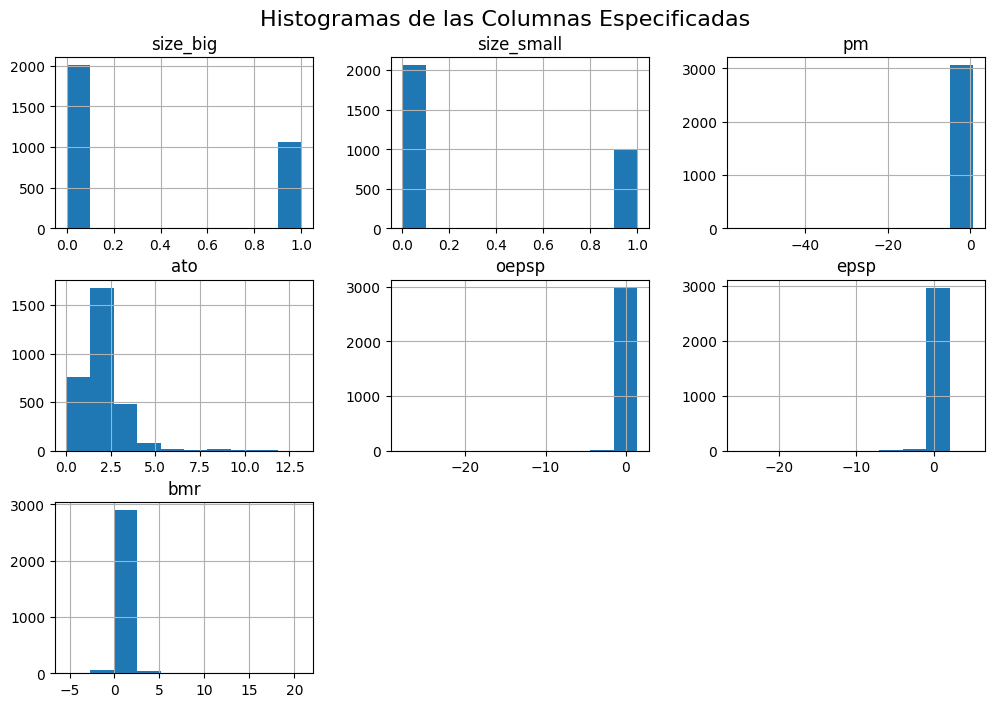

In [486]:
# Crear histogramas para cada columna en ratios
df[ratios].hist(bins=10, figsize=(12, 8))
plt.suptitle('Histogramas de las Columnas Especificadas', y=0.94, fontsize=16)
plt.show()

En los histogramas generados para cada una de las columnas observamos comportamientos diveros, algunos asemejandose muy ligeramente a una distribución normal y en su mayoría no, sin embargo si observamos que la distribución de los datos en algunas columnas si se va hacia rangos muy diferentes lo cual indica que existen valores que se estan comportando de manera anormal a comparación con el resto, por ello se aplicará la winsoriación como uno de los primeros pasos para comenzar a generar mejores predicciones.

A continuación se aplicará winsorización al dataframe en las columnas de los ratios, 'pm', 'ato', 'oepsp', 'epsp', 'bmr".



In [487]:
# Definir columnas para la winsorización
columns_winsorization = ['pm', 'ato', 'oepsp', 'epsp', 'bmr']

# Definir cuartiles bajos y altos para la winsorización
low_quartiles = [0.02, 0.01, 0.01, 0.01, 0.01]
high_quartiles = [0.99, 0.99, 0.99, 0.99, 0.99]

# Aplicar la winsorización a las columnas
for i in range(len(columns_winsorization)):
    # Calcular percentiles para la winsorización
    percentile_1 = df[columns_winsorization[i]].quantile(low_quartiles[i])
    percentile_99 = df[columns_winsorization[i]].quantile(high_quartiles[i])

    # Aplicar la winsorización a las columnas
    df[columns_winsorization[i]] = df[columns_winsorization[i]].clip(lower=percentile_1, upper=percentile_99)

# Crear un nuevo DataFrame con los datos winsorizados
df_win = df.copy()


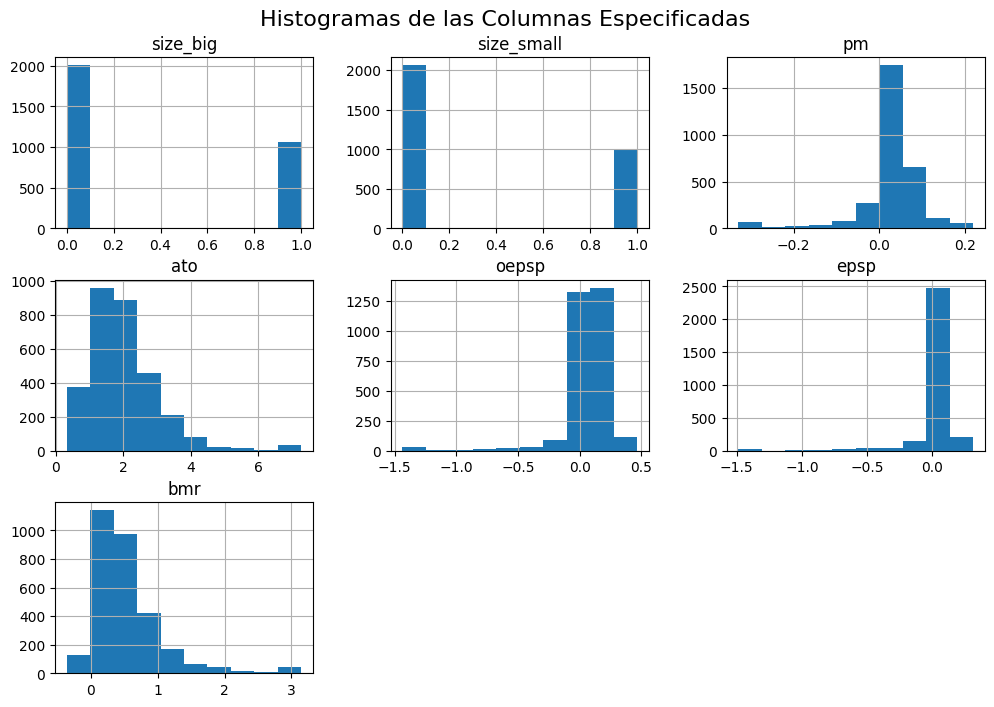

In [488]:
# Crear histogramas para cada columna en ratios
df_win[ratios].hist(bins=10, figsize=(12, 8))
plt.suptitle('Histogramas de las Columnas Especificadas', y=0.94, fontsize=16)
plt.show()

Si comparamos los nuevos histogramas con los anteriores vemos que el rango de aparición de estos disminuye, lo cual nos indica que efectivamente se han eliminado los valores extremos que podrían provocar algún tipo de sesgo al realizar las predicciones del modelo.

## 1.2.3 Multicollienarity

Do the multicollienarity test considering all numeric independent variables:

profit margin, asset turn over, epsp, oepsp, bmr

Interpret the test. If there is a multicollienarity problem, propose how to solve it.

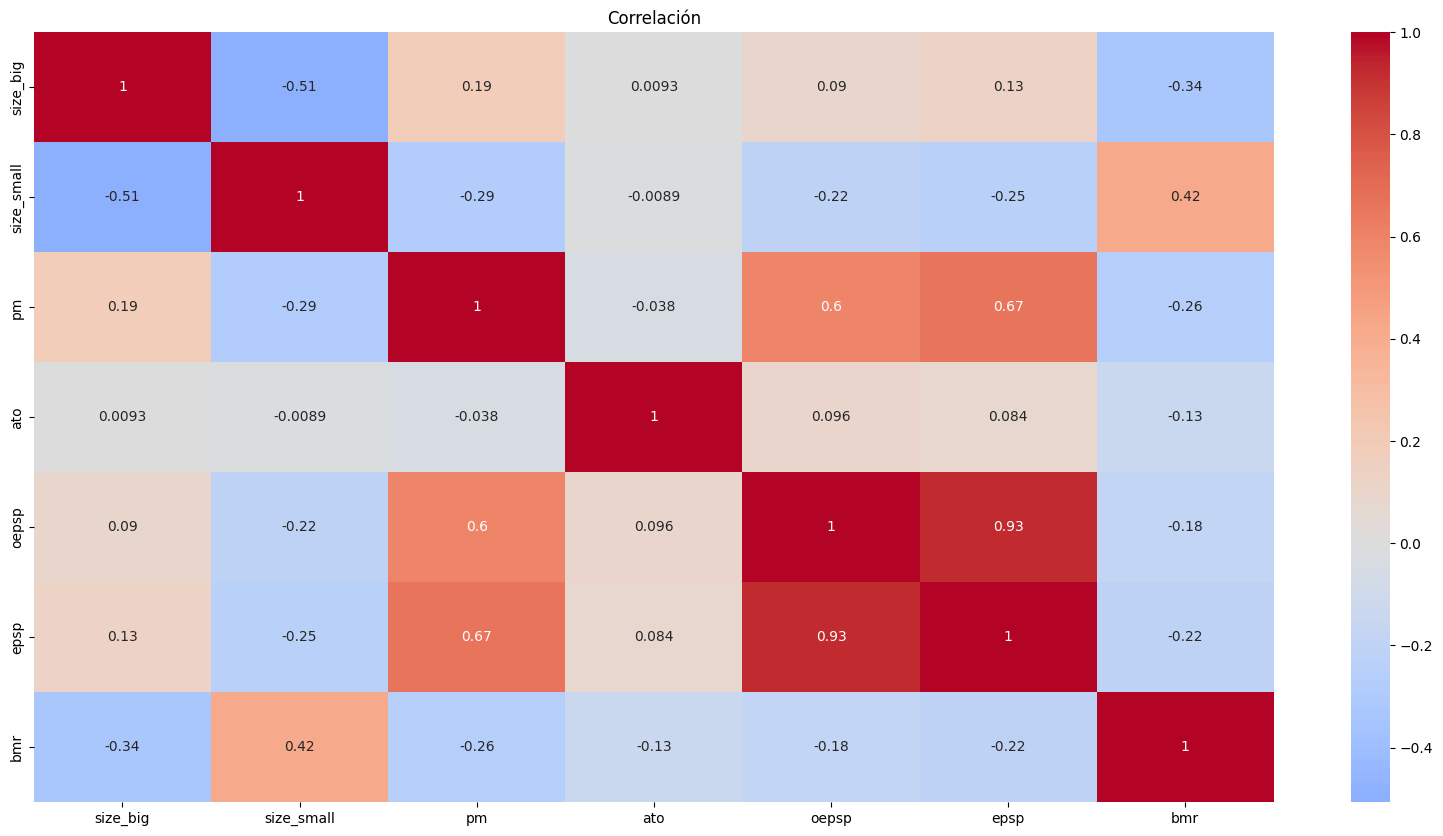

In [489]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
correlation_matrix = df_win[ratios].corr()
# Set up the heatmap figure
plt.figure(figsize = (20, 10))
# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", center = 0)
# Show the plot
plt.title("Correlación")
plt.show()

Después de analizár la matriz de correlación podemos ver que si hay mucha correlación entre varias de las columnas analizadas, oepsp y epsp tienen una correlación positiva altísima, lo cual nos indica que si una aumenta, la otra también lo hará.  

En el contexto financiero esto podría indicarnos que si las ganancias operativas aumentan, también lo harán las ganancias (aquellas ajustadas por el precio de las acciones). No significa que necesariamente una afecte a la otra directamente si no que estadísticamente estas tienen a ir en la misma dirección y a correlacionarse de esta manera.

Tambiéen se observa una gran correlación positiva entre pm con epsp y oepsp. La proporción de las ganancias netas obtenidas en relación a los ingresos totales, también muesstra un comportamineto estadítico similar a las dos previas, sim embargo esta correlación se presenta con menor fuerza.

En cuanto a correlaciiones negativas vemos una alta correlación entre empresas pequeñas y grandes, lo cual es un comportamiento medianamente esperado, ya que las industrias dependen de factores financieros y económicos que afectan a todas las industrias en el mercado, mostrando efectos opuestos en ellas. Por ejemplo en periodos de expansión económica es probable que las empresas grandes se beneficien más, mientras que las pequeñas respondan mejor a las recesiones económicas.


Un método que puede funcionar para limitar la multicolinearidad es usar la regularización:

Métodos de regularización, como la regresión Ridge o Lasso penalizan los coeficientes de las variables y pueden ayudar a mitigar los problemas de multicolinealidad.

También se pueden eliminar las columnas que presenten mayor colinealidad, para identficar mejor cuál de ellas eliminar se puede usar el factor de inflación de la varianza (VIF). Un VIF elevado (generalmente mayor a 10) sugiere multicolinealidad.

In [490]:

X = df_win[['size_big', 'size_small', 'pm', 'ato', 'oepsp', 'epsp', 'bmr']]

X = sm.add_constant(X)

# Llenar los valores nulos con la media de cada columna
X.fillna(X.mean(), inplace=True)

# Calcular el Factor de Inflación de la Varianza (VIF) para cada variable independiente
vif = pd.DataFrame()
vif["COL"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprimir los valores de VIF
print(vif)
#eliminamos epsp
df_win_mc = df_win.drop(["epsp"], axis=1)

          COL       VIF
0       const  9.199138
1    size_big  1.390920
2  size_small  1.539700
3          pm  1.823745
4         ato  1.044933
5       oepsp  7.395661
6        epsp  8.452989
7         bmr  1.297276


Como se observa, la columna const tiene un valor muy alto, pero no es una columna que podemos eliminar, ya que es el intercepto del modelo.
Y como ya habíamos observado en la matriz de correlación, aquellas que nos ocacionan problemas son oepsp y epsp, se optará por eliminar epsp debido a que el valor es más alto, lo que significa mayor multicolinealidad con más columnas.

### Modelo con el dataframe nuevo (winsorización y multicolinealidad)

In [491]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_win_mc[['size_big','size_small','pm','ato','oepsp','bmr']]
#X = df[['size_big','size_medium','size_small','pm','ato','oepsp','epsp','bmr']]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Define your target variable (dependent variable)
y = df_win_mc["f1ry"]
# Create and fit the linear regression model
model = sm.OLS(y, X, missing="drop").fit()

# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     9.375
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           3.24e-10
Time:                        10:10:21   Log-Likelihood:                -64.673
No. Observations:                3018   AIC:                             143.3
Df Residuals:                    3011   BIC:                             185.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0566      0.013     -4.239      0.0

Comparando los resultados obtenidos en el primer modelo contra este se observa una mejora en el r-squared muy mínima, contando inicialmente con un valor de 0.013 y ahora 0.018. Si bién, si se ve una mejoría ésta es casi imperceptible. Por lo que se seguirán los siguientes pasos para conocer e implementas las diversas técnicas propuestas.

### Añadir variables de interacción

Add interaction terms between firm size and earnings per share deflated by price (epsp or oepsp, in case you eliminated one due to multicollienarity). Re-run the regression and INTERPRET the interaction between these two variables. Also, state the regression equation for each size group.

In [492]:
# Añadimos variables de interacción multiplicando las variabls
df_win_mc['oepsp*big'] = df_win_mc['oepsp'] * df_win_mc['size_big']
df_win_mc['oepsp*small'] = df_win_mc['oepsp'] * df_win_mc['size_small']


# Seleccionamos las variables para el modelo
ratio = ['size_big', 'size_small', 'pm', 'ato', 'oepsp', 'oepsp*big', 'oepsp*small', 'bmr']
X = df_win_mc[ratio]

# Agregamos un término constante (intercepto) a las características
X = sm.add_constant(X)

# Rellenamos los valores faltantes con la media
X.fillna(X.mean(), inplace=True)

# Definimos la variable objetivo (variable dependiente)
y = df_win["f1ry"]

# Creamos y ajustamos el modelo de regresión lineal
model = sm.OLS(y, X, missing="drop").fit()

# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)



                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.148
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           2.05e-09
Time:                        10:10:21   Log-Likelihood:                -64.194
No. Observations:                3018   AIC:                             146.4
Df Residuals:                    3009   BIC:                             200.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0516      0.015     -3.543      

Ahora bien, se añadieron variables de interacción, las cuales se utilizan en modelos de regresión para capturar el efecto combinado o modificador de dos o más variables predictoras sobre la variable dependiente. La inclusión de variables de interacción permite modelar relaciones no lineales o contextuales en los datos y mejora la capacidad del modelo para capturar la complejidad de las relaciones subyacentes.


Sin embargo el efecto sumado a lo aplicado anteriormente, no muestra una grán diferencia ya que es de apenas 0.01, sin embargo podemos percatarnos de que si está influyendo de manera positiva en los resultados.

En cuánto a la significancia estadística, gracias a los valores el p y t value, podemos ver que las columnas más significativas estadísticamnete son:
bmr, pm, ato, oepsp,que son básicamente los ratios iniciales.

### Ecuaciones de regresión por cada tamaño de empresa

Empresas grandes:

```
f1ry: ((-0.0564 - 0.0027) - (0.1155 + 0.0255)oepsp + 0.0563bmr + 0.3752pm + 0.0162ato)

```

Empresas medianas:

```
f1ry: (-0.0564 - 0.1155 oepsp + 0.0563bmr + 0.3752pm + 0.0162ato)

```

Empresas pequeñas:

```
f1ry: ((-0.0564 - 0.0073) - (0.1155 + 0.0767)oepsp + 0.0563bmr + 0.3752pm + 0.0162ato)
```



## Run a multiple regression but now using only the last complete year of data (yearf=2022)

Modelo con winsorización , tratamiento de multicolinearidad y variables de interración

In [493]:
# Aplicar filtro para el año fiscal 2022
#df_win_mc = comerce_ind.copy()
df_win_mc = df_win_mc[df_win_mc['qy'] == '2022']
df_win_mc.describe()


,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,...,finlev,mvalue,bookvalue,size_big,size_medium,size_small,oepsp,bmr,oepsp*big,oepsp*small
count,221.0,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,2.210000e+02,...,221.000000,2.190000e+02,2.210000e+02,221.000000,221.000000,221.000000,219.000000,219.000000,219.000000,219.000000
mean,12.0,2.107530e+07,1.640223e+07,3.743303e+06,-9.066987e+04,1.191781e+04,9.282264e+04,1.809468e+05,1.114123e+07,4.439222e+06,...,0.326725,1.565343e+07,2.866548e+06,0.325792,0.266968,0.407240,0.003773,0.583281,0.034220,-0.064856
std,0.0,6.522916e+07,5.071876e+07,1.670418e+07,1.207154e+06,1.155207e+05,2.605320e+05,6.077764e+05,3.974805e+07,1.332354e+07,...,0.311108,6.992522e+07,1.277343e+07,0.469734,0.443380,0.492436,0.420419,0.540854,0.071952,0.382505
min,12.0,8.423000e+03,0.000000e+00,0.000000e+00,-1.680600e+07,-2.670000e+05,-7.074120e+05,-3.217000e+06,3.710026e+03,2.093123e+03,...,0.000000,3.751712e+03,-4.816000e+06,0.000000,0.000000,0.000000,-1.436654,-0.357515,-0.041855,-1.436654
25%,12.0,8.862250e+05,4.664420e+05,2.649040e+05,-2.054000e+03,0.000000e+00,1.404000e+03,1.918000e+03,6.139530e+05,2.647000e+05,...,0.147651,3.216177e+05,1.400010e+05,0.000000,0.000000,0.000000,0.048164,0.215931,0.000000,0.000000
50%,12.0,3.485815e+06,2.133645e+06,7.569180e+05,0.000000e+00,0.000000e+00,1.784800e+04,3.866300e+04,2.306561e+06,1.026423e+06,...,0.302122,1.619517e+06,5.810000e+05,0.000000,0.000000,0.000000,0.090407,0.517725,0.000000,0.000000
75%,12.0,1.279400e+07,8.816000e+06,2.265014e+06,1.000000e+03,0.000000e+00,7.750000e+04,1.613000e+05,7.588000e+06,3.157775e+06,...,0.406508,7.001128e+06,1.792000e+06,1.000000,1.000000,1.000000,0.191136,0.833474,0.053947,0.004101
max,12.0,5.727540e+08,4.290000e+08,2.129040e+08,2.998000e+06,1.307000e+06,2.287000e+06,5.304000e+06,4.626750e+08,1.467910e+08,...,3.222192,8.569390e+08,1.460430e+08,1.000000,1.000000,1.000000,0.466056,3.148535,0.394837,0.466056


In [494]:
ratios = ['size_big', 'size_small', 'pm', 'ato', 'oepsp', 'oepsp*big', 'oepsp*small', 'bmr']
X = df_win_mc[ratios]

# Agregar un término constante (intercepto) a las características
X = sm.add_constant(X)

# Llenar los valores nulos con la media de cada columna
X.fillna(X.mean(), inplace=True)

# Definir la variable objetivo (variable dependiente)
y = df_win_mc["f1ry"]

# Crear y ajustar el modelo de regresión lineal
model = sm.OLS(y, X, missing="drop").fit()

# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     5.442
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           3.05e-06
Time:                        10:10:22   Log-Likelihood:                -12.939
No. Observations:                 219   AIC:                             43.88
Df Residuals:                     210   BIC:                             74.38
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1115      0.056     -1.997      

Este modelo presentó un R-squared 0.172 lo cual es una gran ddiferencia a comparación del primer modelo. Esto puede ser debido a que se está usando la información de un año en particular, lo cual podría traducirse en un comportamiento de los datos más uniforme.
Cabe mencionar que la significancia estadística del oepsp en las empresas pequeñas es más grande, esto también es esperdo debido a que los cambios durante un solo año son mucho más notorios en las empresas pequeñas que en las grandes.

## 1.2.5 Regression Diagnosis
Using this cross-sectional dataset with only annual data for 2022, you have to do the following:

Using matrix algebra calculate the beta coefficients of the same regression model

In [495]:
# Eliminar filas con valores nulos
df_win_mc = df_win_mc.dropna()

# Seleccionar variables de interés
ratios = ['size_big', 'size_small', 'pm', 'ato', 'oepsp', 'oepsp*big', 'oepsp*small', 'bmr']
X = df_win_mc[ratios]

# Agregar un término constante (intercepto) a las características
X = sm.add_constant(X)

# Definir la variable objetivo (dependiente)
y = df_win_mc["f1ry"]

# Calcular los coeficientes del modelo de regresión usando la fórmula de mínimos cuadrados
beta = np.linalg.inv((X.values).T @ X.values) @ (X.values).T @ y.values

# Formatear y mostrar los coeficientes
coef = np.array(["{:.3f}".format(x) for x in beta.flatten().astype(float)], dtype=np.float64)
print(coef)

# Imprimir los coeficientes obtenidos del modelo ajustado previamente
print(model.params)

[-0.322 -0.016 -0.322  1.918  0.088 -1.102 -0.594  0.963  0.249]
const         -0.111455
size_big      -0.036139
size_small    -0.233006
pm             0.536770
ato            0.031374
oepsp         -0.540060
oepsp*big      0.239473
oepsp*small    0.487866
bmr            0.158906
dtype: float64


Using matrix algebra calculate the Hat Matrix

With the hat matrix identify possible leverage observations. EXPLAIN why these observations can be leverage points.

In [496]:
# Obtener el objeto de influencia del modelo
influence = model.get_influence()

# Obtener el resumen de medidas de influencia
summary_frame = influence.summary_frame()

# Mostrar el resumen que incluye medidas como Cook's D, residuos estandarizados, diagonal de leverage (hat), y residuos estandarizados del estudiante
print(summary_frame[['cooks_d', 'standard_resid', 'hat_diag', 'student_resid']])


#df_win_mc


# Seleccionar variables de interés
ratios = ['size_big', 'size_small', 'pm', 'ato', 'oepsp', 'oepsp*big', 'oepsp*small', 'bmr']
X = df_win_mc[ratios]

# Agregar un término constante (intercepto) a las características
X = sm.add_constant(X)

# Definir la variable objetivo (dependiente)
y = df_win_mc["f1ry"]

# Calcular los coeficientes del modelo de regresión usando la fórmula de mínimos cuadrados
beta = np.linalg.inv((X.values).T @ X.values) @ (X.values).T @ y.values

# Formatear y mostrar los coeficientes
coef = np.array(["{:.3f}".format(x) for x in beta.flatten().astype(float)], dtype=np.float64)
print(coef)

# Imprimir los coeficientes obtenidos del modelo ajustado previamente
print(model.params)


# Calcular la matriz de leverage
hat_m = (X.values) @ np.linalg.inv((X.values).T @ X) @ (X.values).T

# Mostrar la matriz de leverage
print(hat_m)

n = df.shape[0]  # Número total de observaciones
k = df.shape[1] - 1  # Número de predictores (excluyendo la variable dependiente)
print(n,k)
leverage_points = summary_frame[summary_frame["hat_diag"] > 3* (k + 1) / n]

# leverage points
print(leverage_points)

             cooks_d  standard_resid  hat_diag  student_resid
1610    3.878870e-03        0.941097  0.037922       0.940839
10253   6.618600e-04       -0.186612  0.146068      -0.186182
11868   7.700704e-04       -0.493528  0.027667      -0.492638
17566   3.096903e-04        0.379976  0.018939       0.379201
29249   3.413491e-04        0.260150  0.043423       0.259571
...              ...             ...       ...            ...
517409  1.243979e-08       -0.002384  0.019316      -0.002378
517691  7.613163e-04       -0.594755  0.019002      -0.593838
518356  2.502255e-03       -0.933635  0.025185      -0.933349
520446  1.832987e-03       -0.876183  0.021037      -0.875697
532416  1.615404e-03       -0.865286  0.019048      -0.864766

[219 rows x 4 columns]
[-0.322 -0.016 -0.322  1.918  0.088 -1.102 -0.594  0.963  0.249]
const         -0.111455
size_big      -0.036139
size_small    -0.233006
pm             0.536770
ato            0.031374
oepsp         -0.540060
oepsp*big      0.239473

La razón por la que estas observaciones pueden ser leverage points es que tienen valores inusuales o extremos en al menos una de las variables predictoras. Esto puede afectar significativamente la estimación de los coeficientes de regresión y, por lo tanto, tener un impacto desproporcionadamente alto en las predicciones ajustadas. Estas observaciones son críticas para evaluar la robustez del modelo y deben ser examinadas cuidadosamente para determinar si son errores de medición, datos atípicos o simplemente casos extremos que deben ser considerados de manera especial.

Identify possible outliers using studentized residuals.

Identificar posibles valores atípicos utilizando residuos estandarizados  implica analizar cómo las observaciones individuales se desvían de las predicciones del modelo, teniendo en cuenta la variabilidad de los residuos. Los residuos studentizados son una medida que ajusta los residuos estándar para tener en cuenta la variabilidad en el modelo.

Para identificar outliers a partir de ellos podemos buscar studentized residuals altos, mayores a 1 lo que podría ser un comportamiento inusual. También identificar patrones gráficos, graficando estos residuos con las variables predictoras para observar el comportamiento de los datos. También se puede medir la influencia del modelo a travéz del cook distance, si alguna observación tiene una influencia alta significa que puede ser un outlier. Sin embargo es importante tener presente el contexto de los datos ya que podría darse el caso que algún comportamiento diferente o atípico sea considerado "normal" o esté esperado.


In [497]:
valores_extremos=summary_frame[abs(summary_frame['student_resid'])>3]
valores_extremos['student_resid']


240376   -5.606636
264973   -3.145276
461187    3.797543
Name: student_resid, dtype: float64

Identify possible outliers using Cook’s distance.

Es una métrica que se utiliza para evaluar la influencia de observaciones individuales en la estimación de los parámetros de un modelo de regresión. Cook's Distance mide cómo cambian los estimadores de los coeficientes cuando una observación se excluye del análisis. Las observaciones con Cook's Distance elevados pueden ser consideradas como posibles valores atípicos o puntos influyentes.

Para identificar outliers con esta métrica debemos observar un cook´s distance alto, mayores a 2 lo que nos puede indicar que la observación tiene una influencia desproporcionada para definir los parámetros del modelo.

Similar a lo que sucede con los studentized residuals, podemos establecer umbrales para definir cuáles consiremamos outliers y cuáles no. Finalmente también  a travéz de gráficas que nos permitan ver las observaciones con valores "raros".


In [498]:

cooks_d=summary_frame[summary_frame['cooks_d']>4/n]
cooks_d['cooks_d']

1610      0.003879
39129     0.008390
40934     0.002358
48437     0.001348
80747     0.009558
            ...   
504962    0.014681
514939    0.028402
518356    0.002502
520446    0.001833
532416    0.001615
Name: cooks_d, Length: 96, dtype: float64

Using studentized residuals and Cook’s distance identify possible influential observations. EXPLAIN your criteria.

Visualizamos studentized residuals y Cook’s distance, peden considerarse tanto valores influyentes como atípicos.
El umral empleado fué el siguiente:


```
# Establecer umbral para Cook's Distance
threshold_cook = 4 / (len(result.fittedvalues) - len(result.params))
```
Este puede ser ajustado de acuerdo a las necesidades que se presenten con los datos.




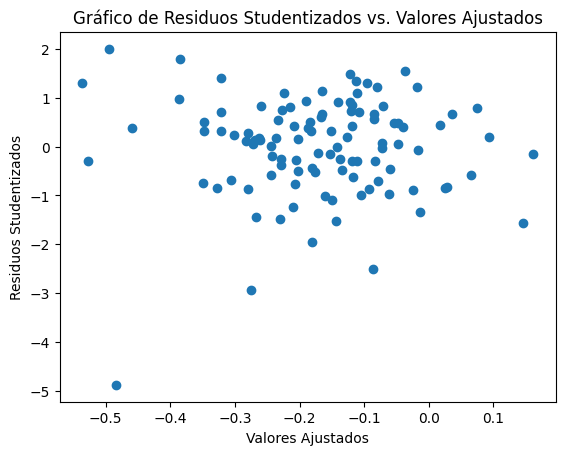

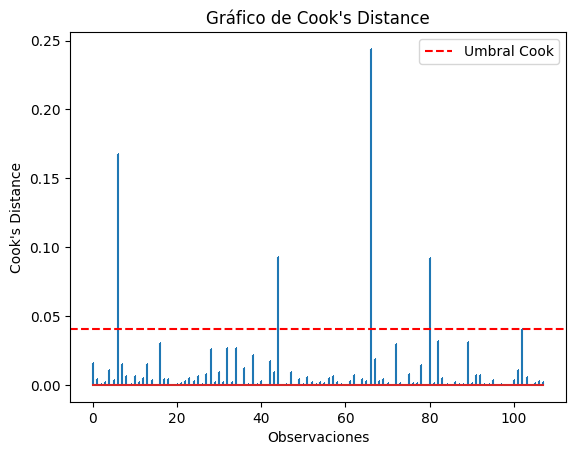

In [499]:
ratios = ['size_big', 'size_small', 'pm', 'ato', 'oepsp', 'oepsp*big', 'oepsp*small', 'bmr']
X = df_win_mc[ratios]

# Agregar un término constante (intercepto) a las características
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)

# Definir la variable objetivo (dependiente)
y = df_win_mc["f1ry"]

# Crear y ajustar el modelo de regresión lineal
result = sm.OLS(y, X, missing="drop").fit()

# Identificar Puntos Influenciables con Distancias de Cook y Residuos Estandarizados

# Residuos studentizados
studentized_residuals = result.get_influence().resid_studentized_internal

# Cook's Distance
cooks_distance = result.get_influence().cooks_distance[0]

# Establecer umbral para Cook's Distance
threshold_cook = 4 / (len(result.fittedvalues) - len(result.params))

# Identificar observaciones con residuos studentizados altos
outliers_studentized = result.fittedvalues[abs(studentized_residuals) > 2]

# Identificar observaciones con Cook's Distance alto
outliers_cook = result.fittedvalues[cooks_distance > threshold_cook]

# Gráfico de Residuos Studentizados vs. Valores Ajustados
plt.scatter(result.fittedvalues, studentized_residuals)
plt.title('Gráfico de Residuos Studentizados vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Studentizados')
plt.show()

# Gráfico de Cook's Distance
plt.stem(range(len(result.fittedvalues)), cooks_distance, markerfmt=",", linefmt="-")
plt.title("Gráfico de Cook's Distance")
plt.xlabel('Observaciones')
plt.ylabel("Cook's Distance")
plt.axhline(y=threshold_cook, color='r', linestyle='--', label='Umbral Cook')
plt.legend()
plt.show()


In [500]:
# Obtener el objeto de influencia del modelo
influence = result.get_influence()

# Obtener el resumen de medidas de influencia
summary_frame = influence.summary_frame()

# Filtrar observaciones influyentes
filter = summary_frame[(summary_frame['cooks_d'] > 4/len(df)) & (abs(summary_frame['student_resid']) > 3)]
filter_index = filter.index.tolist()

# Crear un nuevo DataFrame sin las observaciones influyentes
df_ni = df_win_mc.drop(filter_index)


List the influential observations and decide whether to drop them or keep some of them

Re-run the multiple regression model without the influential observation

In [501]:

X = df_ni[ratios]

# Agregar un término constante (intercepto) a las características
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)

# Definir la variable objetivo (dependiente)
y = df_ni["f1ry"]

# Crear y ajustar el nuevo modelo de regresión lineal
model = sm.OLS(y, X, missing="drop").fit()

# Obtener el resumen del modelo
model_summary = model.summary()

# Imprimir el resumen del modelo
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     3.436
Date:                Fri, 01 Dec 2023   Prob (F-statistic):            0.00160
Time:                        10:10:23   Log-Likelihood:                 26.113
No. Observations:                 106   AIC:                            -34.23
Df Residuals:                      97   BIC:                            -10.26
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2394      0.115     -2.074      

Las variables independientes análizadas fueron diversos ratios de las industrias, así como columnas categoricas que representan los tamaños de las empresas y variables con efecto de interacción entre cada tipo de empresa y el oepsp.
Los ratios seleccionado fueron:
pm
ato
oepsp

El coeficiente de determinación R-squared reportado fue de 0.221 siendo una mejorda de alrededor del doble, aunque aún queda mucho para que sea un modelo más bueno, esto debido a la naturaleza del problema y de los datos.

La interacción de oepsp sobre las empresas pequeñas es más grande que en las empresas grandes y muy similas que el de las empresas medianas.

Los retornos de las empresas medianas son más grandes que en las grandes.

